# Reading Files

In [1]:
# Ariadne Selena Romero Rivero #1957540
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf
from sqlalchemy import engine

# Writing functions in SQL
pysqldf = lambda q: sqldf(q, globals())

In [ ]:
data = pd.read_csv("../videogamesales/videogamesales_clean.csv")
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16322,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16323,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16324,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16325,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Gráficas de cantidad de videojuegos producidos por cada plataforma, género y año

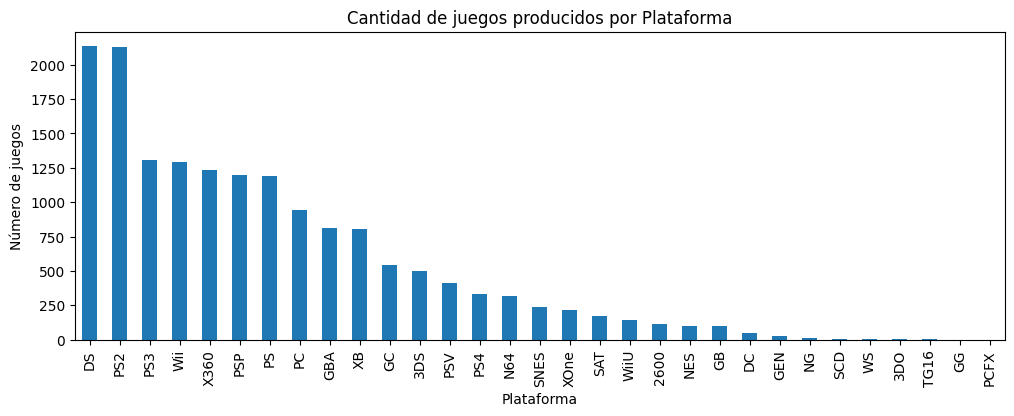

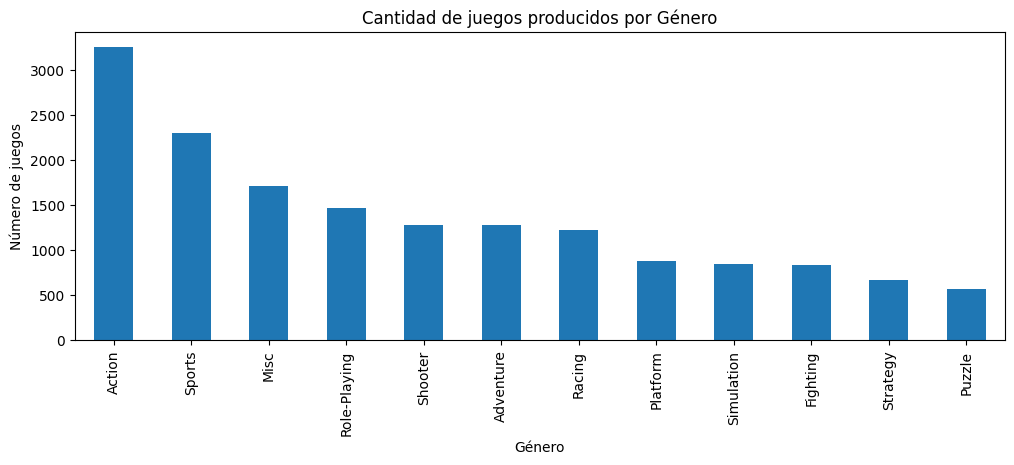

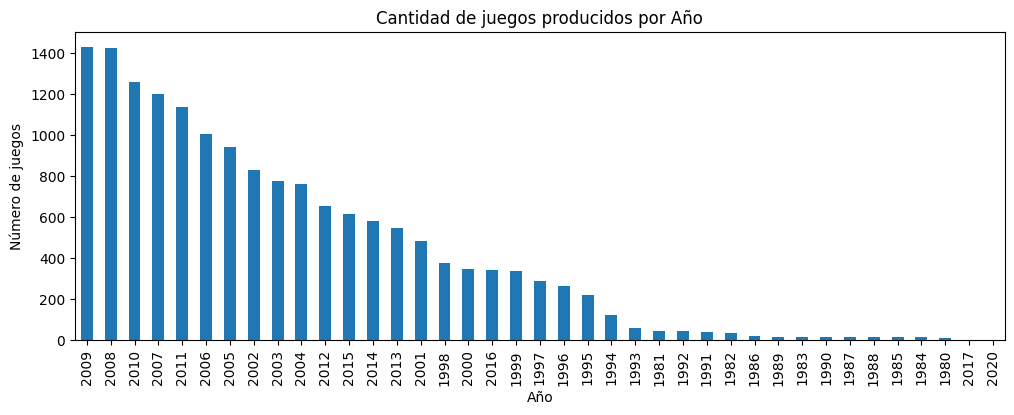

In [138]:
# Grafico de barras
nombres_espanol = {
    'Platform': 'Plataforma',
    'Genre': 'Género',
    'Year': 'Año'
}

for col in ['Platform', 'Genre', 'Year']:
    plt.figure(figsize=(12, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Cantidad de juegos producidos por {nombres_espanol[col]}')
    plt.xlabel(nombres_espanol[col])
    plt.ylabel('Número de juegos')

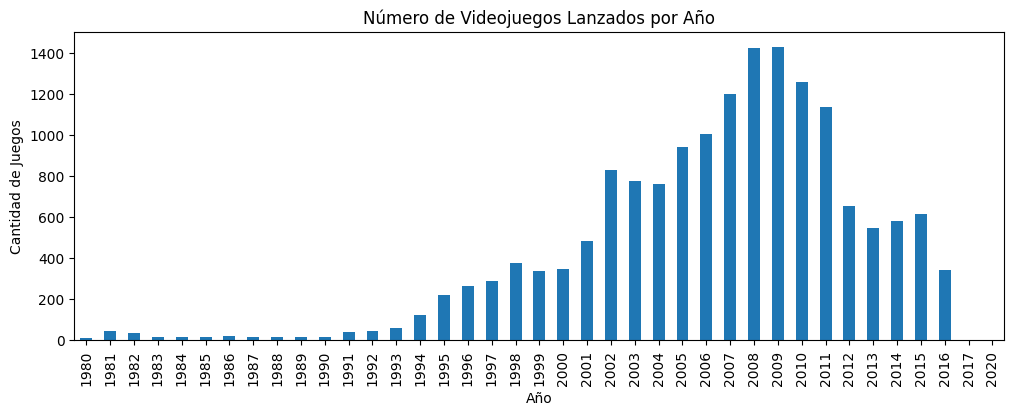

In [103]:
# Cantidad de videojuegos producidos por año, ordenado por año
games_per_year = data['Year'].value_counts().sort_index()

games_per_year.plot(kind='bar', figsize=(12, 4))
plt.title('Número de Videojuegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.show()

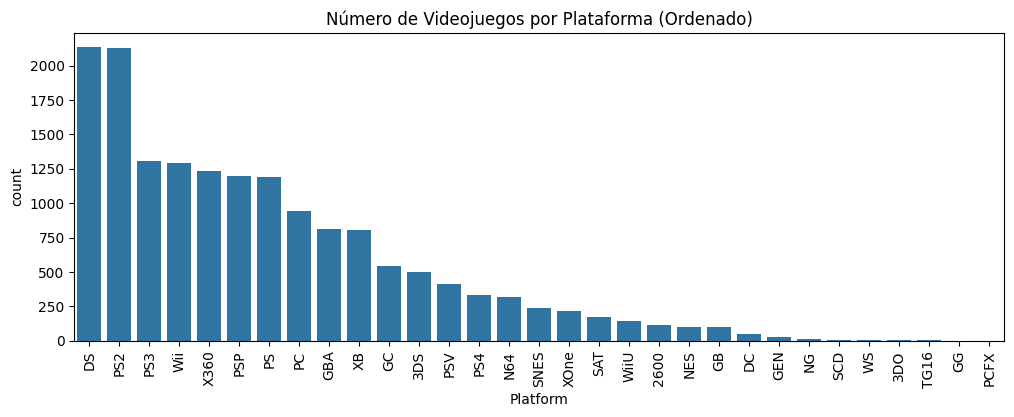

In [104]:
# Cantidad de videojuegos 
num_platform = data['Platform'].value_counts().index

# Graficar el countplot ordenado
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='Platform', order=num_platform)
plt.xticks(rotation=90)
plt.title('Número de Videojuegos por Plataforma (Ordenado)')
plt.show()

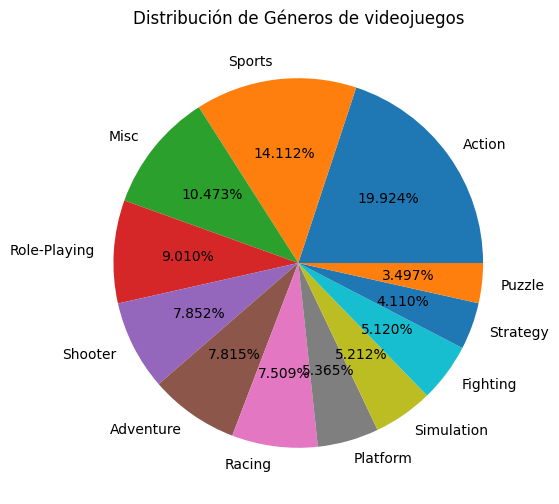

In [ ]:
# Distribución de videojuegos por género
incomes = data['Genre'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(incomes, labels=incomes.index, autopct="%1.3f%%")
plt.title("Distribución de Géneros de videojuegos por género")
plt.show()

## Ventas por año, género y plataforma

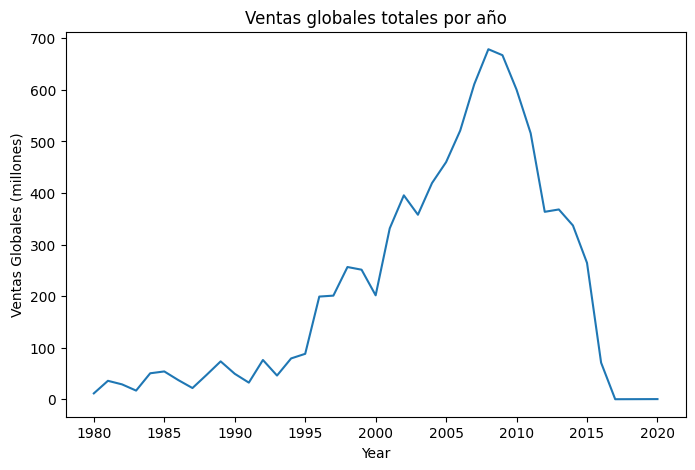

In [ ]:
# Ventas por año de videojuegos
venta_year = data.groupby('Year', as_index=False)['Global_Sales'].sum()

plt.figure(figsize=(8, 5))
sns.lineplot(data=venta_year, x='Year', y='Global_Sales')
plt.title('Ventas globales totales por año')
plt.ylabel('Ventas Globales (millones)')
plt.show()

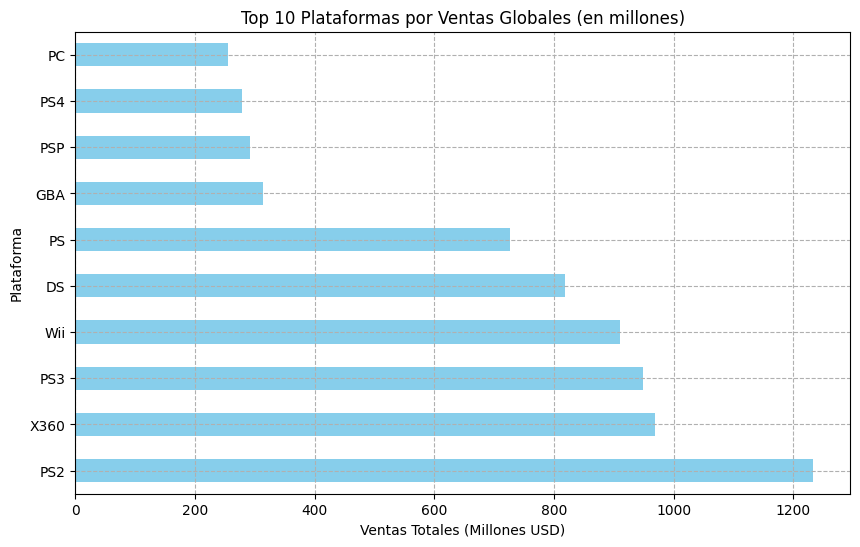

In [162]:
# Consola que más ventas ha tenido
ventas_plataforma = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
ventas_plataforma.plot(kind='barh', color='skyblue')
plt.title('Top 10 Plataformas por Ventas Globales (en millones)')
plt.xlabel('Ventas Totales (Millones USD)')
plt.ylabel('Plataforma')
plt.grid(linestyle='--')
plt.show()

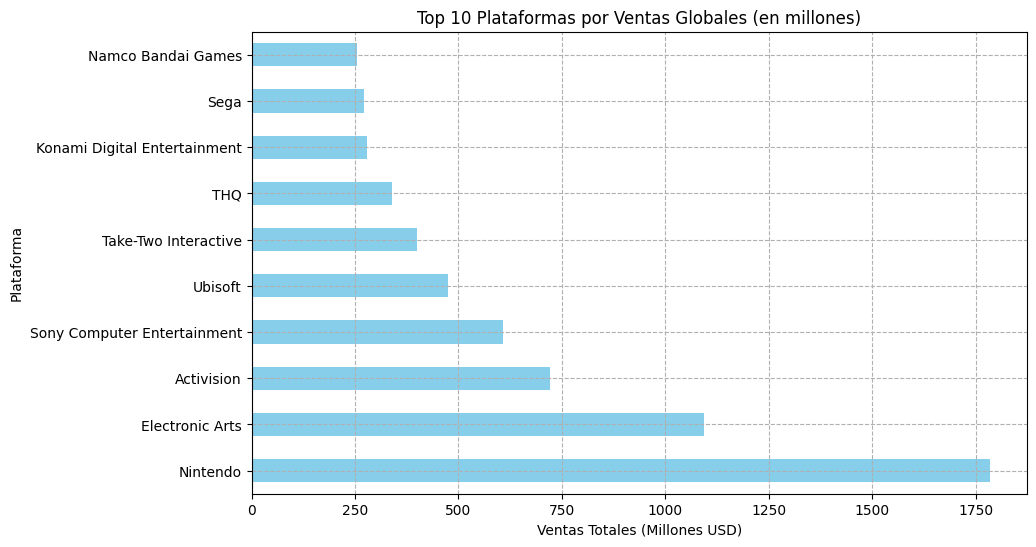

In [ ]:
# Empresa que más ventas ha tenido
ventas_public = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
ventas_public.plot(kind='barh', color='skyblue')
plt.title('Top 10 Publisher por Ventas Globales (en millones)')
plt.xlabel('Ventas Totales (Millones USD)')
plt.ylabel('Empresas')
plt.grid(linestyle='--')
plt.show()

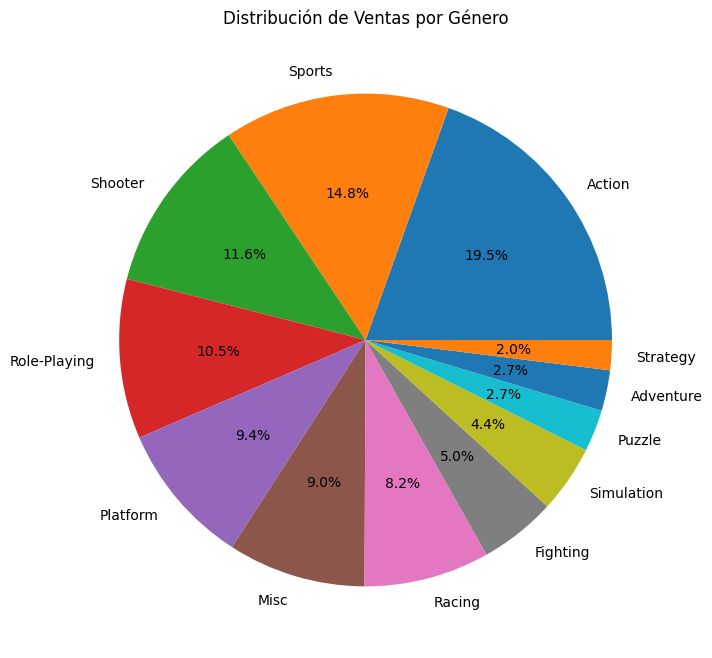

In [114]:
# Géneros más vendidos
ventas_genero = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Diagrama de torta
plt.figure(figsize=(8, 8))
plt.pie(ventas_genero, labels=ventas_genero.index, autopct='%1.1f%%')
plt.title('Distribución de Ventas por Género')
plt.show()

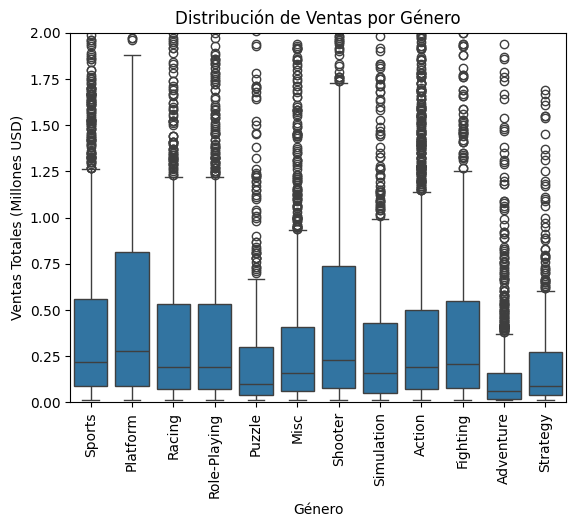

In [ ]:
# Gráfico de cajas, géneros más vendidos
sns.boxplot(x='Genre', y='Global_Sales', data=data)
plt.xticks(rotation=90)
plt.title('Distribución de Ventas por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (Millones USD)')
plt.ylim(0,2) 
plt.show()

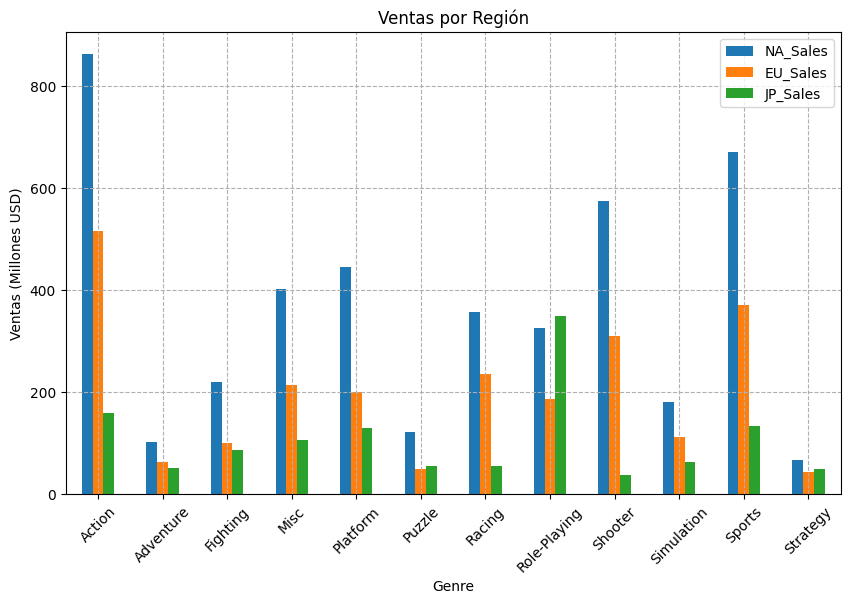

In [160]:
# Ventas por género y región
ventas_region = data.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

# Gráfico de barras
ventas_region.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas por Región')
plt.ylabel('Ventas (Millones USD)')
plt.xticks(rotation=45)
plt.grid(linestyle='--')
plt.show()


## Relación entre ventas

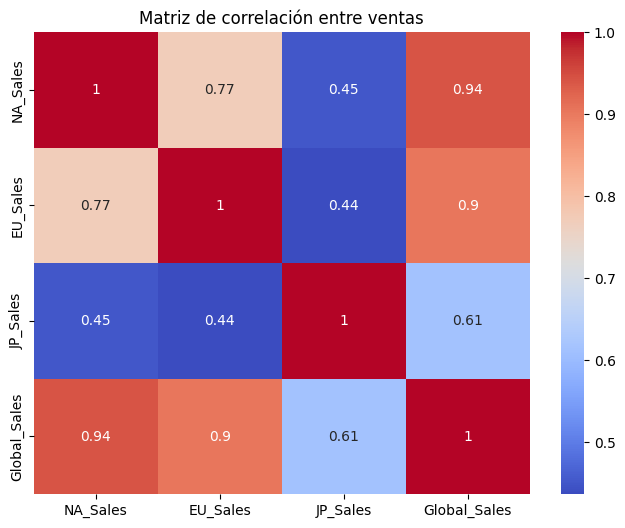

In [ ]:
# Relación entre ventas
plt.figure(figsize=(8, 6))
sns.heatmap(data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre ventas")
plt.show()